# Auwertung


In [1]:
import pandas as pd 
import torch
import evaluate
import os 

/Users/christophhau/Desktop/HA_ML/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/christophhau/Desktop/HA_ML/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
path = '/Users/christophhau/Desktop/HA_ML/data/annotated_data/run_category_scheme_20250925_094617/20250925_094617kreuztabelle.csv'
df=pd.read_csv(path)



In [6]:
df.columns

Index(['Unnamed: 0', 'Code_0_Actually', 'Code_0_Predicted', 'Code_0_Matching',
       'Code_000_Actually', 'Code_000_Predicted', 'Code_000_Matching',
       'Code_1_Actually', 'Code_1_Predicted', 'Code_1_Matching',
       ...
       'Code_e.2  _Matching', 'Code_f  _Actually', 'Code_f  _Predicted',
       'Code_f  _Matching', 'Code_nan_Actually', 'Code_nan_Predicted',
       'Code_nan_Matching', 'Party_Total_Actually', 'Party_Total_Predicted',
       'Party_Total_Matching'],
      dtype='object', length=23644)

In [7]:
path = 'data/annotated_data/run_category_scheme_20250925_094617/bsw_annotated_20250925_094617.csv'
df=pd.read_csv(path)

In [8]:
df.columns

Index(['text', 'text_en', 'cmp_code', 'eu_code', 'annotations'], dtype='object')

# 1. Gesamtperformance (Macro/Micro/Weighted F1, Accuracy)

In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.metrics import (
    classification_report, 
    confusion_matrix,
    accuracy_score,
    f1_score
)
from scipy.stats import bootstrap
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
## je partei je template 
directory = 'data/prompting_results'
templates =os.listdir(directory)

#itterate over templates 
for template in templates: 
    template_list=os.listdir(os.path.join(directory, template))
    #party per template
    for party in template_list:
        full_path= os.path.join(os.path.join(directory, template), party)
        df=pd.read_csv(full_path)
        print(f'Analyzing: {party}')
        #print(f"Number of Annotations NaN:{df['annotations'].isna().sum()} / Number of cmp_code NaN:{df['cmp_code'].isna().sum()}")
        print('')

        #menschliches NaN entspricht 000 bei automatischer Annotation
        df['annotations'] = df['annotations'].fillna('000')
        df.loc[df['annotations'] == 'nan', 'annotations'] = '000'


        # Zähle Errors beim Parsing
        error_saving = (df['annotations'] == 'Error_saving_annotations').sum()
        error_not_all = (df['annotations'] == 'Error_not_all_lines_annotated').sum()
        print(f"Error_saving_annotations: {error_saving}")
        print(f"Error_not_all_lines_annotated: {error_not_all}")
        #print(f"Total errors: {error_saving + error_not_all}")


        # Confusion Matrix
        y_true = df['cmp_code'].astype(str)
        y_pred = df['annotations'].astype(str)

        cm = confusion_matrix(y_true, y_pred)
        print("Confusion Matrix:")
        print(cm)

        report = classification_report(y_true, y_pred, output_dict=True)
        df_report = pd.DataFrame(report).transpose()
        print("\nMetriken:")
        print(df_report)

        print(f"\nAccuracy: {accuracy_score(y_true, y_pred):.4f}")
        print(f"Macro F1: {f1_score(y_true, y_pred, average='macro'):.4f}")
        print(f"Weighted F1: {f1_score(y_true, y_pred, average='weighted'):.4f}")
        #
        

    break



Analyzing: afd_annotated_20250926_103055.csv
Number of Annotations NaN:57 / Number of cmp_code NaN:2

Error_saving_annotations: 0
Error_not_all_lines_annotated: 256
Confusion Matrix:
[[ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [18 27  3 ... 15  0  0]
 [ 2  0  0 ...  0  0  0]]

Metriken:
              precision    recall  f1-score    support
000            0.000000  0.000000  0.000000     9.0000
101            0.000000  0.000000  0.000000     0.0000
101.1          0.000000  0.000000  0.000000     0.0000
101.2          0.000000  0.000000  0.000000     0.0000
101.3          0.000000  0.000000  0.000000     0.0000
...                 ...       ...       ...        ...
H              0.000000  0.000000  0.000000   210.0000
nan            0.000000  0.000000  0.000000     2.0000
accuracy       0.005800  0.005800  0.005800     0.0058
macro avg      0.001946  0.006424  0.002846  2069.0000
weighted avg   0.003123  0.005800  0.003838  

/Users/christophhau/Desktop/HA_ML/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/christophhau/Desktop/HA_ML/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/christophhau/Desktop/HA_ML/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali


Metriken:
              precision   recall  f1-score     support
000            0.000000  0.00000  0.000000     0.00000
019            0.000000  0.00000  0.000000     0.00000
101            0.000000  0.00000  0.000000     1.00000
101.1          0.000000  0.00000  0.000000     0.00000
101.10         0.000000  0.00000  0.000000     0.00000
...                 ...      ...       ...         ...
H              0.000000  0.00000  0.000000    93.00000
nan            0.000000  0.00000  0.000000    83.00000
accuracy       0.002450  0.00245  0.002450     0.00245
macro avg      0.006299  0.00057  0.000481  2449.00000
weighted avg   0.074332  0.00245  0.003146  2449.00000

[126 rows x 4 columns]

Accuracy: 0.0024
Macro F1: 0.0005
Weighted F1: 0.0031
Analyzing: cdu_annotated_20250926_103055.csv
Number of Annotations NaN:23 / Number of cmp_code NaN:21

Error_saving_annotations: 0
Error_not_all_lines_annotated: 1378
Confusion Matrix:
[[ 0  0  0 ...  1  0  0]
 [ 1  0  0 ... 11  0  0]
 [ 0  0  0 ... 

/Users/christophhau/Desktop/HA_ML/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/christophhau/Desktop/HA_ML/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/christophhau/Desktop/HA_ML/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali

In [20]:
import os
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Configuration
directory = 'data/prompting_results'
templates = os.listdir(directory)

# Storage for all results
all_results = []

# Iterate over templates
for template in templates:
    if template.startswith('.'):  # Skip hidden files
        continue
    
    print(f"\n{'='*60}")
    print(f"TEMPLATE: {template}")
    print(f"{'='*60}")
    
    template_path = os.path.join(directory, template)
    template_list = os.listdir(template_path)
    
    # Party per template
    for party_file in template_list:
        if not party_file.endswith('.csv') or 'kreuztabelle' in party_file:
            continue
        
        # Extract party name
        party = party_file.split('_')[0]
        
        full_path = os.path.join(template_path, party_file)
        df = pd.read_csv(full_path)
        
        print(f'\nAnalyzing: {party}')
        
        # Convert to string
        df['cmp_code'] = df['cmp_code'].astype(str)
        df['annotations'] = df['annotations'].astype(str)
        
        # Replace NaN with 000
        df['annotations'] = df['annotations'].fillna('000')
        df.loc[df['annotations'] == 'nan', 'annotations'] = '000'
        
        # Count errors
        n_total = len(df)
        error_saving = (df['annotations'] == 'Error_saving_annotations').sum()
        error_not_all = (df['annotations'] == 'Error_not_all_lines_annotated').sum()
        n_nan_pred = (df['annotations'] == '000').sum()
        n_nan_true = (df['cmp_code'] == 'nan').sum()
        
        print(f"Error_saving_annotations: {error_saving}")
        print(f"Error_not_all_lines_annotated: {error_not_all}")
        
        # Clean data for metrics
        mask = (df['cmp_code'] != 'nan') & \
               (df['annotations'] != 'Error_saving_annotations') & \
               (df['annotations'] != 'Error_not_all_lines_annotated')
        
        y_true = df.loc[mask, 'cmp_code']
        y_pred = df.loc[mask, 'annotations']
        n_valid = len(y_true)
        
        # Calculate metrics
        if n_valid > 0:
            acc = accuracy_score(y_true, y_pred)
            macro_f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
            micro_f1 = f1_score(y_true, y_pred, average='micro', zero_division=0)
            weighted_f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
            
            print(f"\nAccuracy: {acc:.4f}")
            print(f"Macro F1: {macro_f1:.4f}")
            print(f"Weighted F1: {weighted_f1:.4f}")
        else:
            acc = macro_f1 = micro_f1 = weighted_f1 = 0.0
            print("\n⚠️ No valid samples!")
        
        # Store results
        all_results.append({
            'Template': template,
            'Party': party,
            'N_Total': n_total,
            'N_Valid': n_valid,
            'N_Error_Saving': error_saving,
            'N_Error_Not_All': error_not_all,
            'N_NaN_Predictions': n_nan_pred,
            'N_NaN_GroundTruth': n_nan_true,
            'Pct_Usable': round(100 * n_valid / n_total, 2) if n_total > 0 else 0,
            'Accuracy': round(acc, 4),
            'Macro_F1': round(macro_f1, 4),
            'Micro_F1': round(micro_f1, 4),
            'Weighted_F1': round(weighted_f1, 4)
        })
    
    # Save template-specific results
    template_results = [r for r in all_results if r['Template'] == template]
    df_template = pd.DataFrame(template_results)
    
    output_file = os.path.join(template_path, f'{template}_results.csv')
    df_template.to_csv(output_file, index=False)
    print(f"\n✓ Saved template results: {output_file}")

# Save all results
df_all = pd.DataFrame(all_results)
df_all.to_csv(os.path.join(directory, 'all_results.csv'), index=False)
print(f"\n{'='*60}")
print("✓ All results saved to: all_results.csv")

# Create APA-style tables
print(f"\n{'='*60}")
print("CREATING APA TABLES")
print(f"{'='*60}")

# Table 1: Per-Party Performance by Template
pivot_macro = df_all.pivot(index='Party', columns='Template', values='Macro_F1')
pivot_acc = df_all.pivot(index='Party', columns='Template', values='Accuracy')

# Format for APA
pivot_macro_apa = pivot_macro.applymap(lambda x: f"{x:.3f}" if pd.notna(x) else "—")
pivot_acc_apa = pivot_acc.applymap(lambda x: f"{x:.3f}" if pd.notna(x) else "—")

# Save APA tables
pivot_macro_apa.to_csv(os.path.join(directory, 'apa_table_macro_f1.csv'))
pivot_acc_apa.to_csv(os.path.join(directory, 'apa_table_accuracy.csv'))

print("\n✓ APA Table (Macro F1):")
print(pivot_macro_apa)
print("\n✓ Saved to: apa_table_macro_f1.csv")

print("\n✓ APA Table (Accuracy):")
print(pivot_acc_apa)
print("\n✓ Saved to: apa_table_accuracy.csv")

# Table 2: Template Summary
template_summary = df_all.groupby('Template').agg({
    'N_Total': 'sum',
    'N_Valid': 'sum',
    'N_Error_Not_All': 'sum',
    'Pct_Usable': 'mean',
    'Accuracy': 'mean',
    'Macro_F1': 'mean',
    'Weighted_F1': 'mean'
}).round(3)

template_summary_apa = template_summary.copy()
template_summary_apa['Pct_Usable'] = template_summary_apa['Pct_Usable'].apply(lambda x: f"{x:.1f}%")
template_summary_apa['Accuracy'] = template_summary_apa['Accuracy'].apply(lambda x: f"{x:.3f}")
template_summary_apa['Macro_F1'] = template_summary_apa['Macro_F1'].apply(lambda x: f"{x:.3f}")
template_summary_apa['Weighted_F1'] = template_summary_apa['Weighted_F1'].apply(lambda x: f"{x:.3f}")

template_summary_apa.to_csv(os.path.join(directory, 'apa_table_template_summary.csv'))

print("\n✓ Template Summary:")
print(template_summary_apa)
print("\n✓ Saved to: apa_table_template_summary.csv")

print(f"\n{'='*60}")
print("✅ ANALYSIS COMPLETE")
print(f"{'='*60}")


TEMPLATE: run_instruct_only_20250926_103055

Analyzing: afd
Error_saving_annotations: 0
Error_not_all_lines_annotated: 256

Accuracy: 0.0066
Macro F1: 0.0029
Weighted F1: 0.0040

Analyzing: fdp
Error_saving_annotations: 0
Error_not_all_lines_annotated: 219

Accuracy: 0.0051
Macro F1: 0.0009
Weighted F1: 0.0027

Analyzing: sswb
Error_saving_annotations: 0
Error_not_all_lines_annotated: 604

Accuracy: 0.0070
Macro F1: 0.0018
Weighted F1: 0.0016

Analyzing: bsw
Error_saving_annotations: 0
Error_not_all_lines_annotated: 661

Accuracy: 0.0000
Macro F1: 0.0000
Weighted F1: 0.0000

Analyzing: linke
Error_saving_annotations: 0
Error_not_all_lines_annotated: 1251

Accuracy: 0.0052
Macro F1: 0.0007
Weighted F1: 0.0063

Analyzing: cdu
Error_saving_annotations: 0
Error_not_all_lines_annotated: 1378

Accuracy: 0.0050
Macro F1: 0.0008
Weighted F1: 0.0072

Analyzing: gruene
Error_saving_annotations: 0
Error_not_all_lines_annotated: 1772

Accuracy: 0.0035
Macro F1: 0.0013
Weighted F1: 0.0033

Analyzi

/var/folders/y1/nwn64wsx1zdcpp75s80zznj00000gn/T/ipykernel_8699/3869715175.py:119: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_macro_apa = pivot_macro.applymap(lambda x: f"{x:.3f}" if pd.notna(x) else "—")
/var/folders/y1/nwn64wsx1zdcpp75s80zznj00000gn/T/ipykernel_8699/3869715175.py:120: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_acc_apa = pivot_acc.applymap(lambda x: f"{x:.3f}" if pd.notna(x) else "—")


### Visualisation

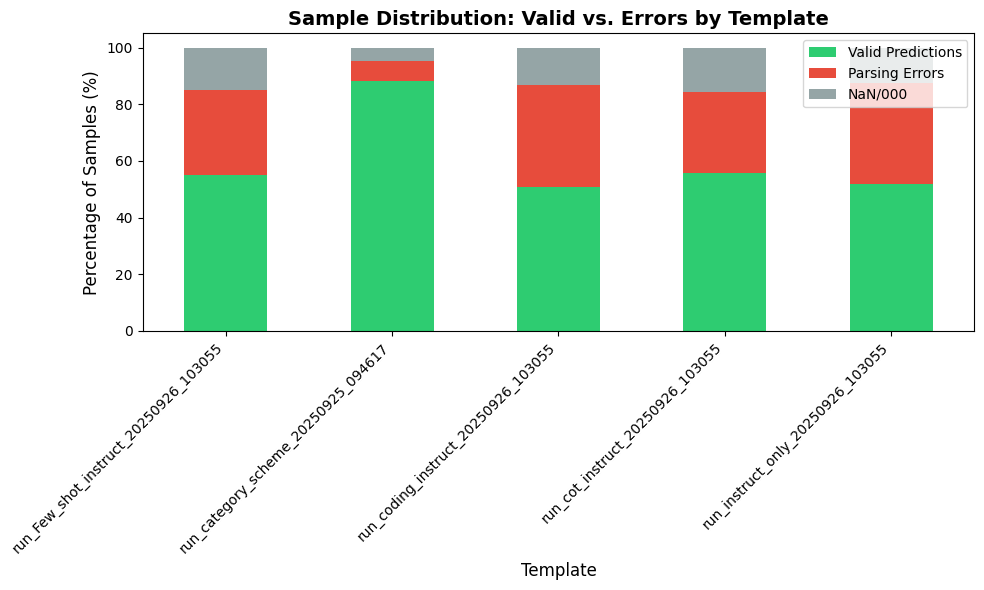

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('data/prompting_results/all_results.csv')

# Prepare data
df['N_Error_Total'] = df['N_Error_Saving'] + df['N_Error_Not_All']
df['N_Success'] = df['N_Valid']
df['N_NaN'] = df['N_NaN_Predictions']

# Aggregate by template
agg = df.groupby('Template')[['N_Success', 'N_Error_Total', 'N_NaN']].sum()
agg_pct = agg.div(agg.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
agg_pct.plot(kind='bar', stacked=True, ax=ax, 
             color=['#2ecc71', '#e74c3c', '#95a5a6'])

ax.set_ylabel('Percentage of Samples (%)', fontsize=12)
ax.set_xlabel('Template', fontsize=12)
ax.set_title('Sample Distribution: Valid vs. Errors by Template', 
             fontsize=14, fontweight='bold')
ax.legend(['Valid Predictions', 'Parsing Errors', 'NaN/000'], 
          loc='upper right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.savefig('viz_error_breakdown.png', dpi=300)
plt.show()

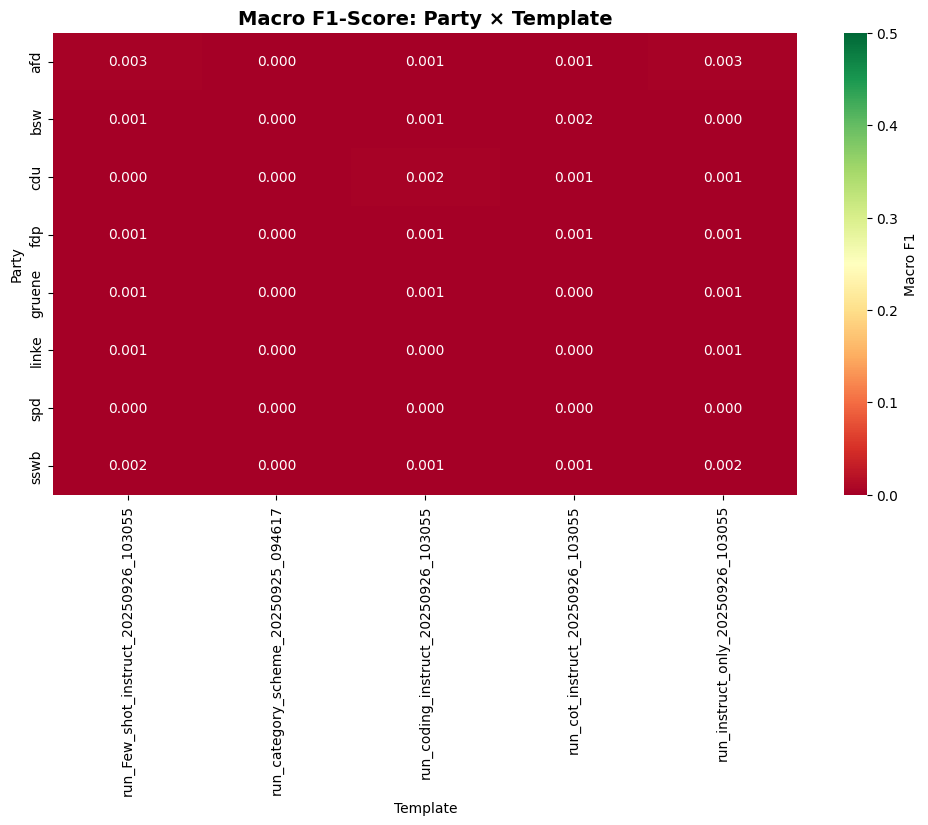

In [24]:
# Pivot for heatmap
pivot = df.pivot(index='Party', columns='Template', values='Macro_F1')

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='.3f', cmap='RdYlGn', 
            vmin=0, vmax=0.5, cbar_kws={'label': 'Macro F1'})

ax.set_title('Macro F1-Score: Party × Template', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Template')
ax.set_ylabel('Party')
#plt.tight_layout()
plt.savefig('viz_heatmap_macro_f1.png', dpi=300)
plt.show()

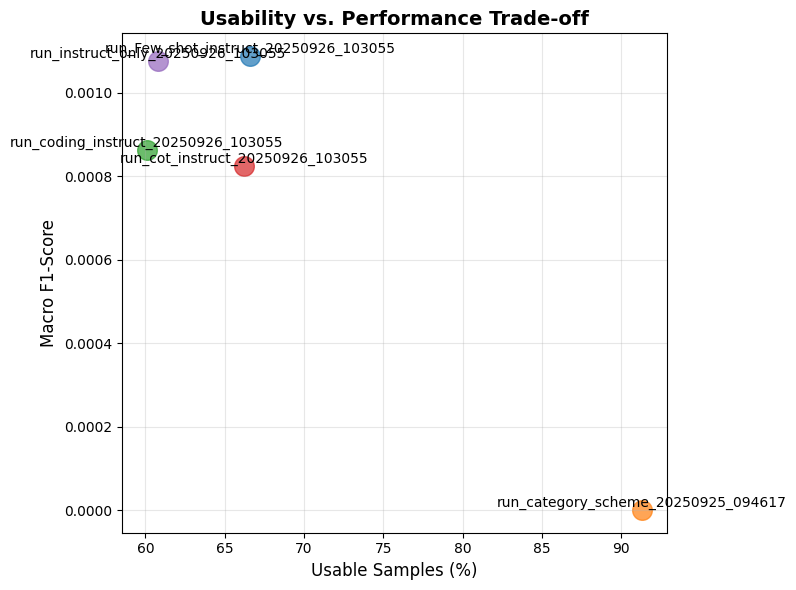

In [25]:
agg = df.groupby('Template').agg({
    'Pct_Usable': 'mean',
    'Macro_F1': 'mean',
    'Accuracy': 'mean'
}).reset_index()

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

for _, row in agg.iterrows():
    ax.scatter(row['Pct_Usable'], row['Macro_F1'], s=200, alpha=0.7)
    ax.annotate(row['Template'], 
                (row['Pct_Usable'], row['Macro_F1']),
                fontsize=10, ha='center', va='bottom')

ax.set_xlabel('Usable Samples (%)', fontsize=12)
ax.set_ylabel('Macro F1-Score', fontsize=12)
ax.set_title('Usability vs. Performance Trade-off', 
             fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('viz_usability_performance.png', dpi=300)
plt.show()

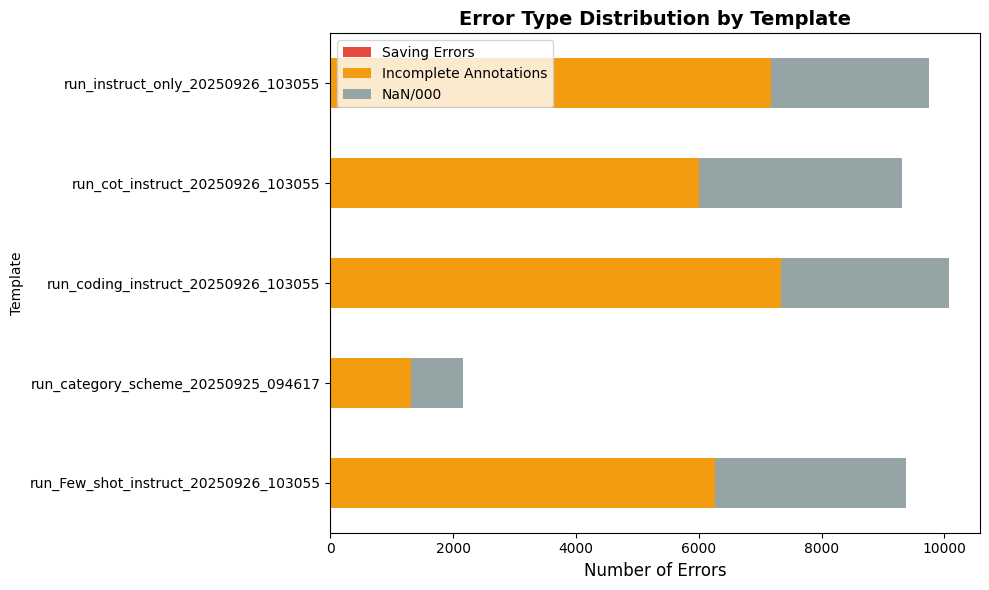

In [26]:
agg = df.groupby('Template').agg({
    'N_Error_Saving': 'sum',
    'N_Error_Not_All': 'sum',
    'N_NaN_Predictions': 'sum'
})

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
agg.plot(kind='barh', stacked=True, ax=ax, 
         color=['#e74c3c', '#f39c12', '#95a5a6'])

ax.set_xlabel('Number of Errors', fontsize=12)
ax.set_title('Error Type Distribution by Template', 
             fontsize=14, fontweight='bold')
ax.legend(['Saving Errors', 'Incomplete Annotations', 'NaN/000'])
plt.tight_layout()
plt.savefig('viz_error_types.png', dpi=300)
plt.show()

/var/folders/y1/nwn64wsx1zdcpp75s80zznj00000gn/T/ipykernel_8699/2594933862.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


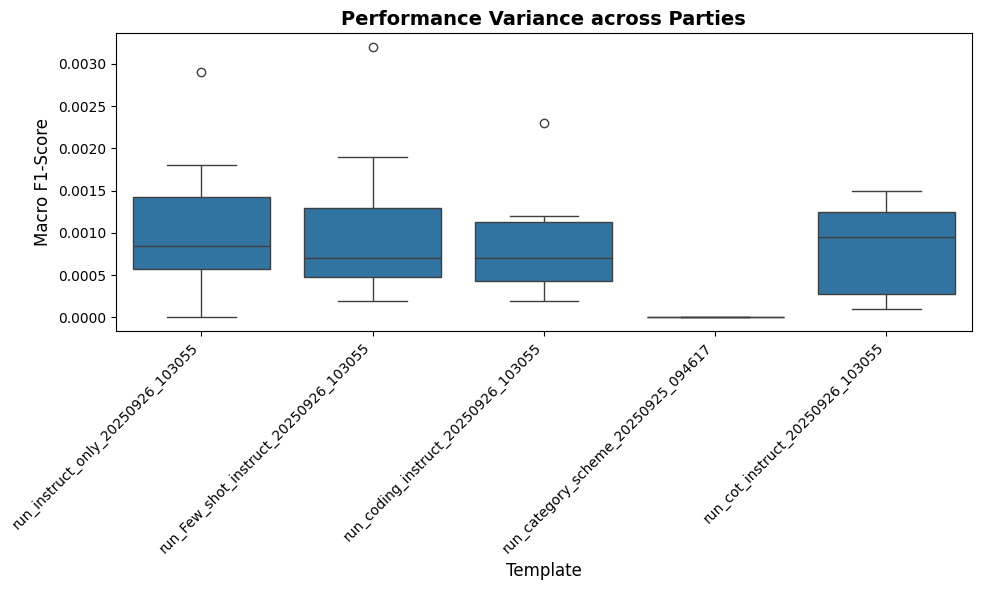

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='Template', y='Macro_F1', ax=ax)

ax.set_ylabel('Macro F1-Score', fontsize=12)
ax.set_xlabel('Template', fontsize=12)
ax.set_title('Performance Variance across Parties', 
             fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.savefig('viz_variance_boxplot.png', dpi=300)
plt.show()

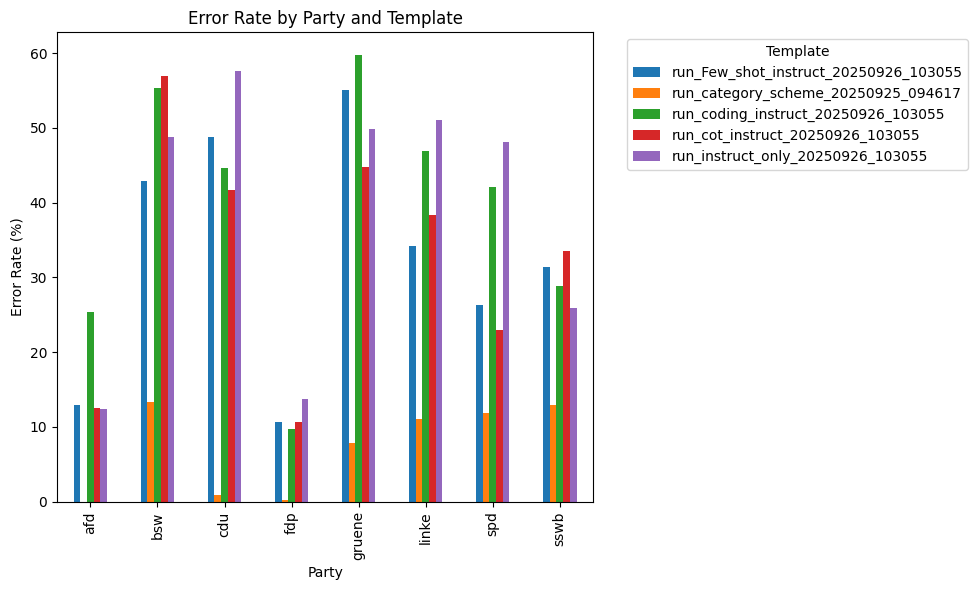

In [28]:
df['Error_Rate'] = (df['N_Error_Total'] / df['N_Total']) * 100

fig, ax = plt.subplots(figsize=(10, 6))
pivot = df.pivot(index='Party', columns='Template', values='Error_Rate')
pivot.plot(kind='bar', ax=ax)
ax.set_ylabel('Error Rate (%)')
ax.set_title('Error Rate by Party and Template')
plt.legend(title='Template', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig('viz_party_error_rates.png', dpi=300)

# One Line at the time annotation with CoT and Context (using template optimized_1)

In [31]:
import os
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Configuration
directory = '/Users/christophhau/Desktop/HA_ML/data/annotated_data/run_llm_optimized_1_batch_flattened'
template_list = os.listdir(directory)

# Storage for all results
all_results = []


    # Party per template
for party_file in template_list:
    if not party_file.endswith('.csv') or 'kreuztabelle' in party_file:
        continue
    
    # Extract party name
    party = party_file.split('_')[0]
    print(party_file)
    full_path = os.path.join(directory, party_file)
    
    df = pd.read_csv(full_path)
    
    print(f'\nAnalyzing: {party}')
    
    # Convert to string
    df['cmp_code'] = df['cmp_code'].astype(str)
    df['category'] = df['category'].astype(str)
    
    # Replace NaN with 000
    df['category'] = df['category'].fillna('000')
    df.loc[df['category'] == 'nan', 'category'] = '000'
    
    # Count errors
    n_total = len(df)
    error_saving = (df['category'] == 'Error_saving_annotations').sum()
    error_not_all = (df['category'] == 'Error_not_all_lines_annotated').sum()
    n_nan_pred = (df['category'] == '0').sum()
    n_nan_true = (df['cmp_code'] == 'nan').sum()
    
    print(f"Error_saving_annotations: {error_saving}")
    print(f"Error_not_all_lines_annotated: {error_not_all}")
    
    # Clean data for metrics
    mask = (df['cmp_code'] != 'nan') & \
        (df['category'] != 'Error_saving_annotations') & \
        (df['category'] != 'Error_not_all_lines_annotated')
    
    y_true = df.loc[mask, 'cmp_code']
    y_pred = df.loc[mask, 'category']
    n_valid = len(y_true)
    
    # Calculate metrics
    if n_valid > 0:
        acc = accuracy_score(y_true, y_pred)
        macro_f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
        micro_f1 = f1_score(y_true, y_pred, average='micro', zero_division=0)
        weighted_f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
        
        print(f"\nAccuracy: {acc:.4f}")
        print(f"Macro F1: {macro_f1:.4f}")
        print(f"Weighted F1: {weighted_f1:.4f}")
    else:
        acc = macro_f1 = micro_f1 = weighted_f1 = 0.0
        print("\n⚠️ No valid samples!")
    
    # Store results
    all_results.append({
        'Template': template,
        'Party': party,
        'N_Total': n_total,
        'N_Valid': n_valid,
        'N_Error_Saving': error_saving,
        'N_Error_Not_All': error_not_all,
        'N_NaN_Predictions': n_nan_pred,
        'N_NaN_GroundTruth': n_nan_true,
        'Pct_Usable': round(100 * n_valid / n_total, 2) if n_total > 0 else 0,
        'Accuracy': round(acc, 4),
        'Macro_F1': round(macro_f1, 4),
        'Micro_F1': round(micro_f1, 4),
        'Weighted_F1': round(weighted_f1, 4)
    })

# Save template-specific results
template_results = [r for r in all_results if r['Template'] == template]
df_template = pd.DataFrame(template_results)

output_file = os.path.join(template_path, f'{template}_results.csv')
df_template.to_csv(output_file, index=False)
print(f"\n✓ Saved template results: {output_file}")

# Save all results
df_all = pd.DataFrame(all_results)
df_all.to_csv(os.path.join(directory, 'all_results.csv'), index=False)
print(f"\n{'='*60}")
print("✓ All results saved to: all_results.csv")

# Create APA-style tables
print(f"\n{'='*60}")
print("CREATING APA TABLES")
print(f"{'='*60}")

# Table 1: Per-Party Performance by Template
pivot_macro = df_all.pivot(index='Party', columns='Template', values='Macro_F1')
pivot_acc = df_all.pivot(index='Party', columns='Template', values='Accuracy')

# Format for APA
pivot_macro_apa = pivot_macro.applymap(lambda x: f"{x:.3f}" if pd.notna(x) else "—")
pivot_acc_apa = pivot_acc.applymap(lambda x: f"{x:.3f}" if pd.notna(x) else "—")

# Save APA tables
pivot_macro_apa.to_csv(os.path.join(directory, 'apa_table_macro_f1.csv'))
pivot_acc_apa.to_csv(os.path.join(directory, 'apa_table_accuracy.csv'))

print("\n✓ APA Table (Macro F1):")
print(pivot_macro_apa)
print("\n✓ Saved to: apa_table_macro_f1.csv")

print("\n✓ APA Table (Accuracy):")
print(pivot_acc_apa)
print("\n✓ Saved to: apa_table_accuracy.csv")

# Table 2: Template Summary
template_summary = df_all.groupby('Template').agg({
    'N_Total': 'sum',
    'N_Valid': 'sum',
    'N_Error_Not_All': 'sum',
    'Pct_Usable': 'mean',
    'Accuracy': 'mean',
    'Macro_F1': 'mean',
    'Weighted_F1': 'mean'
}).round(3)

template_summary_apa = template_summary.copy()
template_summary_apa['Pct_Usable'] = template_summary_apa['Pct_Usable'].apply(lambda x: f"{x:.1f}%")
template_summary_apa['Accuracy'] = template_summary_apa['Accuracy'].apply(lambda x: f"{x:.3f}")
template_summary_apa['Macro_F1'] = template_summary_apa['Macro_F1'].apply(lambda x: f"{x:.3f}")
template_summary_apa['Weighted_F1'] = template_summary_apa['Weighted_F1'].apply(lambda x: f"{x:.3f}")

template_summary_apa.to_csv(os.path.join(directory, 'apa_table_template_summary.csv'))

print("\n✓ Template Summary:")
print(template_summary_apa)
print("\n✓ Saved to: apa_table_template_summary.csv")

print(f"\n{'='*60}")
print("✅ ANALYSIS COMPLETE")
print(f"{'='*60}")

gruene_annotated.csv

Analyzing: gruene
Error_saving_annotations: 0
Error_not_all_lines_annotated: 0

Accuracy: 0.0000
Macro F1: 0.0000
Weighted F1: 0.0000
linke_annotated.csv

Analyzing: linke
Error_saving_annotations: 0
Error_not_all_lines_annotated: 0

Accuracy: 0.0321
Macro F1: 0.0115
Weighted F1: 0.0315
cdu_annotated.csv

Analyzing: cdu
Error_saving_annotations: 0
Error_not_all_lines_annotated: 0

Accuracy: 0.0000
Macro F1: 0.0000
Weighted F1: 0.0000
bsw_annotated.csv

Analyzing: bsw
Error_saving_annotations: 0
Error_not_all_lines_annotated: 0

Accuracy: 0.0489
Macro F1: 0.0174
Weighted F1: 0.0486
spd_annotated.csv

Analyzing: spd
Error_saving_annotations: 0
Error_not_all_lines_annotated: 0

Accuracy: 0.0337
Macro F1: 0.0107
Weighted F1: 0.0324
fdp_annotated.csv

Analyzing: fdp
Error_saving_annotations: 0
Error_not_all_lines_annotated: 0

Accuracy: 0.0309
Macro F1: 0.0103
Weighted F1: 0.0258
sswb_annotated.csv

Analyzing: sswb
Error_saving_annotations: 0
Error_not_all_lines_annota

/var/folders/y1/nwn64wsx1zdcpp75s80zznj00000gn/T/ipykernel_8699/2648792062.py:109: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_macro_apa = pivot_macro.applymap(lambda x: f"{x:.3f}" if pd.notna(x) else "—")
/var/folders/y1/nwn64wsx1zdcpp75s80zznj00000gn/T/ipykernel_8699/2648792062.py:110: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_acc_apa = pivot_acc.applymap(lambda x: f"{x:.3f}" if pd.notna(x) else "—")
